In [13]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
mydata = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header = None)

In [14]:
mydata.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9    ...        22     23      24      25      26      27      28  \
0  0.14710   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.12790   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.10520   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.10430   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 32 columns]

In [42]:
X = mydata.values[:, 2:]
Y = mydata.values[:, 1]
X_train, X_test, y_train, y_test = train_test_split( X, Y, random_state = 0)

clf1 = KNeighborsClassifier(n_neighbors = 3)

clf1.fit(X_train, y_train)

y_pred= clf1.predict(X_test)


In [21]:
print("Accuracy: " + str(accuracy_score(y_test,y_pred)*100))

Accuracy: 92.3076923076923


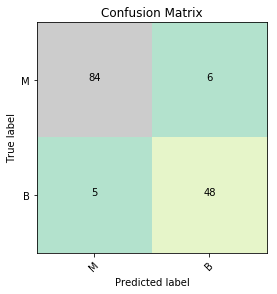

In [27]:
class_outcomes = ['M', 'B' ]
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):

    plt.imshow(cm, interpolation='nearest', cmap='Pastel2')
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color= "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= class_outcomes,
                      title='Confusion Matrix')

In [26]:
print("Model Metrics:")
print()
print("Accuracy: " + str(accuracy_score(y_test,y_pred)*100))
print("Positive Precision: " + str(precision_score(y_test, y_pred, pos_label = 'M')))
print("Negative Precision: " + str(precision_score(y_test, y_pred, pos_label = 'B')))
print("Positive Recall: " + str(recall_score(y_test, y_pred, pos_label = 'M')))
print("Negative Recall: " + str(recall_score(y_test, y_pred, pos_label = 'B')))
print("Positive F-Measure: " + str(f1_score(y_test, y_pred, pos_label = 'M')))
print("Negative F-Measure: " + str(f1_score(y_test, y_pred, pos_label = 'B' )))

Model Metrics:

Accuracy: 92.3076923076923
Positive Precision: 0.8888888888888888
Negative Precision: 0.9438202247191011
Positive Recall: 0.9056603773584906
Negative Recall: 0.9333333333333333
Positive F-Measure: 0.897196261682243
Negative F-Measure: 0.9385474860335196


In [60]:
X_Probs= clf1.predict_proba(X_test)
X_Probs= pd.DataFrame(X_Probs)
X_Probs.head()

0         1
0  0.333333  0.666667
1  1.000000  0.000000
2  1.000000  0.000000
3  0.333333  0.666667
4  1.000000  0.000000